In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df_emprg_orc = pd.read_excel('estatistica.basica.bussab.9ed/Dados_EB.xls',
                      header=1,
                      index_col=0)
df_emprg_orc.index.name = 'Num'
df_emprg_orc['N de Filhos'].fillna(0,inplace=True)
df_emprg_orc['N de Filhos'] = df_emprg_orc['N de Filhos'].astype('int64')

### Tabela 2.1 - Informações sobre os 36 empregados da seção de orçamento da Companhia MB

In [27]:
display(df_emprg_orc)

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
Num,,,,,,,
1,solteiro,ensino fundamental,0,4.00,26,3,interior
2,casado,ensino fundamental,1,4.56,32,10,capital
3,casado,ensino fundamental,2,5.25,36,5,capital
4,solteiro,ensino médio,0,5.73,20,10,outra
5,solteiro,ensino fundamental,0,6.26,40,7,outra
6,casado,ensino fundamental,0,6.66,28,0,interior
7,solteiro,ensino fundamental,0,6.86,41,0,interior
8,solteiro,ensino fundamental,0,7.39,43,4,capital
9,casado,ensino médio,1,7.59,34,10,capital


## 2.2 Distribuição de Frequências
### Tabela 2.2 Frequencias e Percentagem dos empregados da seção de orçamento segundo o grau de instrução

In [28]:
df_grau_inst = pd.DataFrame(df_emprg_orc.groupby(df_emprg_orc['Grau de Instrução'])['Grau de Instrução'].count(),
                           )
df_grau_inst.columns = ['frequencia']
df_grau_inst['proporcao'] = round(df_grau_inst['frequencia']/df_grau_inst['frequencia'].sum(),2)
df_grau_inst['porcentagem'] = round(df_grau_inst['proporcao']*100,2)
df_grau_inst


,frequencia,proporcao,porcentagem
Grau de Instrução,,,
ensino fundamental,12,0.33,33.0
ensino médio,18,0.50,50.0
superior,6,0.17,17.0


In [29]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [30]:
bins = [4,8,12,16,20,24]
cats = pd.cut(df_emprg_orc['Salario (x Sal Min)'],bins,right=False)
freq_sal = pd.value_counts(cats,sort=False)
freq_sal = pd.DataFrame(freq_sal)
freq_sal.columns = ['freq']
freq_sal['porc'] = round((freq_sal.freq/freq_sal.freq.sum()) * 100,2)
display(freq_sal)

,freq,porc
"[4, 8)",10,27.78
"[8, 12)",12,33.33
"[12, 16)",8,22.22
"[16, 20)",5,13.89
"[20, 24)",1,2.78


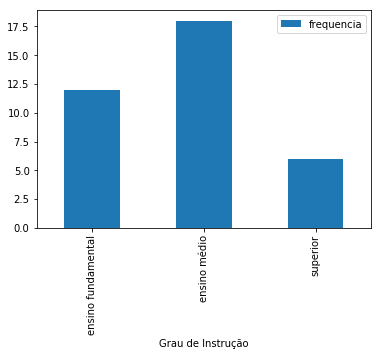

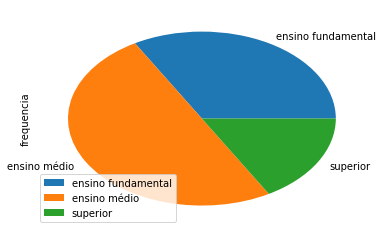

In [9]:
df_grau_inst.plot(kind='bar',y='frequencia')
df_grau_inst.plot(kind='pie',y='frequencia')

,frequencia,proporcao,porcentagem
N de Filhos,,,
0,20,0.56,56.0
1,5,0.14,14.0
2,7,0.19,19.0
3,3,0.08,8.0
5,1,0.03,3.0


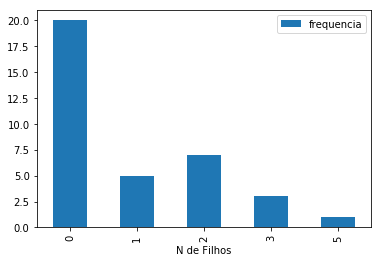

In [31]:
df_filhos = pd.DataFrame(df_emprg_orc.groupby(df_emprg_orc['N de Filhos'])['N de Filhos'].count(),
                           )
df_filhos.columns = ['frequencia']
df_filhos['proporcao'] = round(df_filhos['frequencia']/df_filhos['frequencia'].sum(),2)
df_filhos['porcentagem'] = round(df_filhos['proporcao']*100,2)
display(df_filhos)
df_filhos.plot(kind='bar',y='frequencia')
df_filhos['dummy'] = np.zeros(df_filhos.shape[0])
#df_filhos.plot(kind='scatter',y='frequencia')
#df_filhos.reset_index().plot(kind='scatter',y='frequencia',x='N de Filhos')

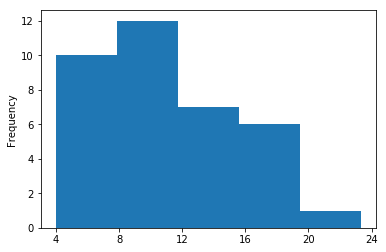

In [11]:
df_emprg_orc['Salario (x Sal Min)'].plot(kind='hist',bins=len(bins)-1,xticks=bins)

<Container object of 3 artists>

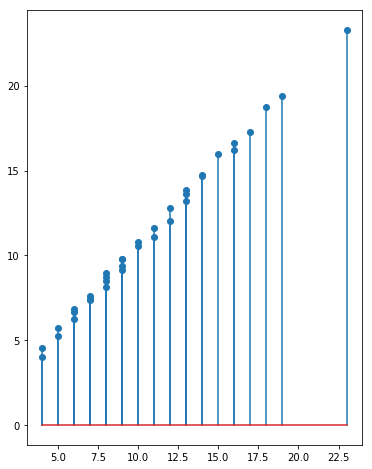

In [12]:
stems = df_emprg_orc['Salario (x Sal Min)'].values.astype(np.int32)
stems.sort() #sort inplace
plt.figure(figsize=(6,8))
plt.stem(stems,df_emprg_orc['Salario (x Sal Min)'].values)
#lt.stem([1,1,2,2,3,3],[12,13,22,24,31,32])